In [13]:
# Implementing a Convolution Neural Network using Pytorch
# Tutorial: https://www.youtube.com/watch?v=HcvnPyCG-Hk&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=5

# Importing the libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
# hyper parameters
num_epochs = 5
batch_size = 4
learning_rate = 0.01

In [16]:
# dataset has PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader( train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader( test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


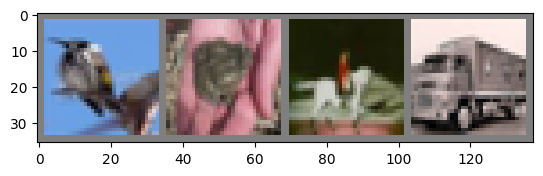

In [17]:
def imgshow(img):
    img = img/2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imgshow(torchvision.utils.make_grid(images))

In [18]:
conv1 = nn.Conv2d(3, 6, 5) # 3 input image channel, 6 output channels, 5x5 square convolution kernel
pool = nn.MaxPool2d(2, 2) # Max pooling over a (2, 2) window
conv2 = nn.Conv2d(6, 16, 5) # 6 input image channel, 16 output channels, 5x5 square convolution kernel
print(images.shape)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


In [19]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2) # 2x2 kernel, stride 2
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 16 channels, 5x5 kernel, 120 output channels
        self.fc2 = nn.Linear(120, 84) # 120 input channels, 84 output channels
        self.fc3 = nn.Linear(84, 10) # 84 input channels, 10 output channels
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 1st layer
        x = self.pool(F.relu(self.conv2(x))) # 2nd layer
        x = x.view(-1, 16 * 5 * 5) # flatten the output of the 2nd layer
        x = F.relu(self.fc1(x)) # 3rd layer
        x = F.relu(self.fc2(x)) # 4th layer
        x = self.fc3(x) # 5th layer
        
        return x

In [20]:
model = ConvNet().to(device)

critertion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [25]:
n_total_steps = len(train_loader)

losses = []
for epoch in range(num_epochs):
    for i, (images, label) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5x5 kernel
        images = images.to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = critertion(outputs, labels)
        
        # backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            
        losses.append(loss.item())
        
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

epoch 1/5, step 2000/12500, loss = 1.4039
epoch 1/5, step 4000/12500, loss = 1.3764
epoch 1/5, step 6000/12500, loss = 1.3710
epoch 1/5, step 8000/12500, loss = 1.3848
epoch 1/5, step 10000/12500, loss = 1.3818
epoch 1/5, step 12000/12500, loss = 1.3589
epoch 2/5, step 2000/12500, loss = 1.3943
epoch 2/5, step 4000/12500, loss = 1.3892
epoch 2/5, step 6000/12500, loss = 1.3843
epoch 2/5, step 8000/12500, loss = 1.4179
epoch 2/5, step 10000/12500, loss = 1.3820
epoch 2/5, step 12000/12500, loss = 1.4042
epoch 3/5, step 2000/12500, loss = 1.3888
epoch 3/5, step 4000/12500, loss = 1.4047
epoch 3/5, step 6000/12500, loss = 1.3853
epoch 3/5, step 8000/12500, loss = 1.3920
epoch 3/5, step 10000/12500, loss = 1.3938
epoch 3/5, step 12000/12500, loss = 1.3991
epoch 4/5, step 2000/12500, loss = 1.3748
epoch 4/5, step 4000/12500, loss = 1.3909
epoch 4/5, step 6000/12500, loss = 1.3785
epoch 4/5, step 8000/12500, loss = 1.3719
epoch 4/5, step 10000/12500, loss = 1.3881
epoch 4/5, step 12000/12500

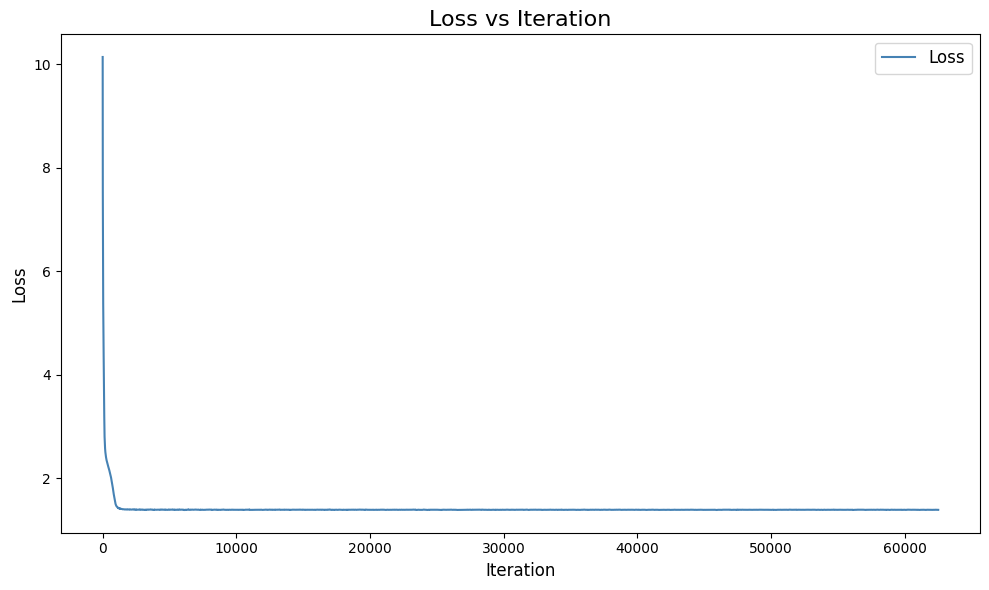

In [26]:
# Plotting the loss
plt.figure(figsize=(10, 6))  # figure size

# Smoothing the loss curve using a moving average
window_size = 100
smoothed_losses = [sum(losses[i-window_size:i])/window_size if i >= window_size else sum(losses[:i+1])/(i+1) for i in range(len(losses))]

# smoothed loss curve
plt.plot(smoothed_losses, linewidth=1.5, color='steelblue', label='Loss')

plt.title('Loss vs Iteration', fontsize=16) 
plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
plt.tight_layout()  
plt.savefig('loss.pdf')
plt.show()

In [27]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 9.27 %
Accuracy of plane: 0.0 %
Accuracy of car: 0.0 %
Accuracy of bird: 0.0 %
Accuracy of cat: 85.2 %
Accuracy of deer: 0.0 %
Accuracy of dog: 0.0 %
Accuracy of frog: 0.0 %
Accuracy of horse: 7.5 %
Accuracy of ship: 0.0 %
Accuracy of truck: 0.0 %
